In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
# trieda AdalineGD
class AdalineGD(object):
    # metóda init() - inicializacna metoda s parametrami pre rychlost ucenia a pocet iteracii
    def __init__(self, rychlost_ucenia=0.00001, pocet_iteracii=1000):
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    # metoda fit() - ucenie neuronovej siete
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.pocet_iteracii):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        plt.plot(self.cost_)
        return self
    
    # metóda net_input()
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # metóda predikcia() - linearna aktivacna funkcia
    def linearna_aktivacia(self, X):
        return self.net_input(X)
    
    # metóda predikcia()
    def predikcia(self, X):
        print(self.linearna_aktivacia(X))
        return np.where(self.linearna_aktivacia(X) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('player_stats_NHL.csv', header=0)

In [4]:
df

,PLAYER_ID,PLAYER_NAME,PRIMARY_POS,HEIGHT_CM,WEIGHT_KG,G,A,GP,PPG,PIM,LEAGUE_YEAR
0,18,David Printz,D,180,79,0,0,12,0.000000,4,2006-2007
1,44,Christer Olsson,D,178,87,2,4,30,0.200000,10,1996-1997
2,48,Tommy Sj・Edin,D,188,86,1,11,29,0.413793,22,1993-1994
3,69,Niklas Kronwall,D,193,92,3,24,79,0.341772,40,2018-2019
4,73,Leif Rohlin,D,188,82,2,8,40,0.250000,8,1996-1997
5,75,Nils Ekman,LW,175,75,6,9,34,0.441176,24,2006-2007
6,79,Johan Garpenl・Ev,RW,181,88,2,14,73,0.219178,31,1999-2000
7,83,Ky・Esti Karjalainen,RW,195,113,1,8,28,0.321429,12,1991-1992
8,89,Mathias Tj・Ernqvist,LW,191,93,4,7,78,0.141026,34,2007-2008
9,97,Jonas Fr・Egren,D,183,86,1,6,41,0.170732,28,2008-2009


In [5]:
# rozdelenie dát na testovacie a trénovacie
df_test = df.iloc[df.PLAYER_ID.count() - 500:df.PLAYER_ID.count()]
df_train = df.iloc[0:df.PLAYER_ID.count() - 500]
# zoradenie dát podĺa stĺpca pozície hráča
df_train = df_train.sort_values(by=['PRIMARY_POS'])

# na trénovanie vyberieme stĺpce HEIGHT_CM, WEIGHT_KG, G, A, GP, PIM
train_x = df_train.iloc[0:, [5,6]].values
# vyberieme stĺpec PRIMARY_POS s pozíciamimhráčov
train_y = df_train.iloc[0:, 2].values
# hodnoty obrancov 'D', zmeníme na hodnotu -1, všetky ostatné na hodnotu 1
train_y = np.where(train_y == 'D', -1, 1)

test_x = df_test.iloc[:, [5,6]].values
test_y = df_test.iloc[:, 2].values
test_y = np.where(test_y == 'D', -1, 1)

In [6]:
# výpis počtu trénovacích dát
df_train.count()

PLAYER_ID      2302
PLAYER_NAME    2302
PRIMARY_POS    2302
HEIGHT_CM      2302
WEIGHT_KG      2302
G              2302
A              2302
GP             2302
PPG            2302
PIM            2302
LEAGUE_YEAR    2302
dtype: int64

In [7]:
# výpis počtu testovacích dát
df_test.count()

PLAYER_ID      500
PLAYER_NAME    500
PRIMARY_POS    500
HEIGHT_CM      500
WEIGHT_KG      500
G              500
A              500
GP             500
PPG            500
PIM            500
LEAGUE_YEAR    500
dtype: int64

In [8]:
# výpis trénovacích hodnôt
print(train_x)
print(train_y)

[[ 1  2]
 [ 1  3]
 [ 0  3]
 ...
 [ 3  4]
 [ 2  1]
 [ 6 17]]
[1 1 1 ... 1 1 1]


In [9]:
# výpis testovacích hodnôt
print(test_x)
print(test_y)

[[ 0  0]
 [19 22]
 [ 4  2]
 [ 7  3]
 [ 2  6]
 [18 39]
 [25 28]
 [ 6 18]
 [11  8]
 [21 20]
 [ 1  3]
 [ 0  0]
 [38 46]
 [ 0  2]
 [18  9]
 [ 3  3]
 [ 0  0]
 [ 3  2]
 [16 11]
 [ 8 19]
 [ 3  7]
 [ 0  1]
 [10 16]
 [ 3  6]
 [ 2  5]
 [ 2  0]
 [12 20]
 [ 1  7]
 [ 1  4]
 [ 3  1]
 [ 3  6]
 [ 6 11]
 [ 0  6]
 [ 2  5]
 [41 87]
 [ 3  4]
 [ 1  2]
 [ 6  5]
 [ 0  0]
 [ 0  3]
 [ 0  2]
 [ 1  1]
 [ 0  4]
 [ 5 15]
 [ 3  7]
 [ 1  3]
 [ 6  3]
 [ 5  4]
 [ 2  1]
 [ 0  0]
 [ 1  0]
 [ 1  3]
 [ 2  4]
 [ 1  2]
 [ 0  0]
 [ 1  2]
 [ 3  8]
 [ 1  2]
 [ 1  1]
 [ 1  0]
 [ 2  6]
 [ 1  6]
 [ 0  2]
 [18 19]
 [ 1  0]
 [27 15]
 [ 0  1]
 [ 0  0]
 [ 0  1]
 [ 3  5]
 [ 0  3]
 [10  9]
 [ 2  1]
 [ 3  7]
 [ 6 14]
 [ 2  4]
 [ 1  3]
 [ 1  5]
 [34 48]
 [ 8  9]
 [ 4  9]
 [ 0  6]
 [ 2  0]
 [ 3  8]
 [ 2  3]
 [ 1  5]
 [ 1  2]
 [ 1 14]
 [30 24]
 [ 2 17]
 [17 16]
 [12 16]
 [ 2 23]
 [ 3  6]
 [ 9 28]
 [ 2  6]
 [13 26]
 [36 63]
 [ 6 11]
 [ 8  1]
 [14 10]
 [ 7 16]
 [ 5 21]
 [10 18]
 [ 5 16]
 [ 4 26]
 [ 1  5]
 [ 2  3]
 [ 1  1]
 [12 14]
 [ 2  9]
 

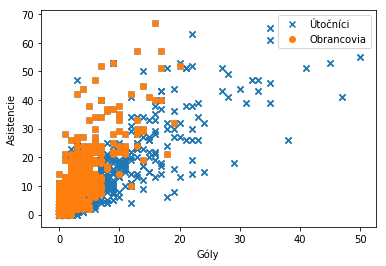

In [10]:
# grafické zobrazenie rozloženia trénovacích dát
plt.scatter(train_x[np.r_[0:597,1382:], 0], train_x[np.r_[0:597,1382:], 1], marker='x', label='Útočníci')
plt.scatter(train_x[597:1382, 0], train_x[597:1382, 1], marker='o', label='Obrancovia')

plt.xlabel('Góly')
plt.ylabel('Asistencie')
plt.legend()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


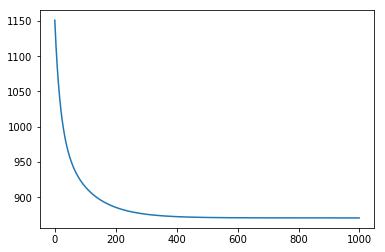

In [11]:
# štandardizácia dát pomocou funkcie scale()
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

# volanie konštruktora triedy AdelineGD
adalineGD = AdalineGD()

# trénovanie dát
adalineGD.fit(train_x, train_y)

In [12]:
# výpočet presnosti neurónovej siete
accuracy = adalineGD.predikcia(test_x)
print()
print(test_y)
print()
print(accuracy)
print()
print('Presnost siete je: ', accuracy_score(test_y, accuracy)*100, '%')

[ 1.87922939e-01  8.31316228e-01  4.05857218e-01  5.84979708e-01
  1.40172264e-01  2.28320308e-01  1.06418696e+00  4.46709145e-02
  7.08883299e-01  1.03431406e+00  1.64047602e-01  1.87922939e-01
  1.41202239e+00  1.25235813e-01  1.16862719e+00  3.04358304e-01
  1.87922939e-01  3.35701867e-01  9.65629366e-01  1.53638054e-01
  1.78984052e-01  1.56579376e-01  3.87979445e-01  2.10327615e-01
  1.71515827e-01  3.28233641e-01  4.02915895e-01  3.86733502e-02
  1.32704039e-01  3.67045430e-01  2.10327615e-01  2.64075854e-01
 -1.38438018e-04  1.71515827e-01  3.37402367e-01  2.73014741e-01
  1.95391164e-01  4.52137232e-01  1.87922939e-01  9.38922505e-02
  1.25235813e-01  2.26734727e-01  6.25486877e-02  6.85462519e-02
  1.78984052e-01  1.64047602e-01  5.14824357e-01  4.13325443e-01
  2.96890078e-01  1.87922939e-01  2.58078290e-01  1.64047602e-01
  2.02859390e-01  1.95391164e-01  1.87922939e-01  1.95391164e-01
  1.47640490e-01  1.95391164e-01  2.26734727e-01  2.58078290e-01
  1.40172264e-01  7.00169